# Processamento Pontual

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

# Operação Pontual


* Uma operação realizada em uma única amostra (pixel) e que produz um único resultado
* Podem ser descritas na forma de função

\begin{equation*}
    s = T(e) \\
    s\,=\,valor\,de\,saída \\
    T\,=\,operação\,aplicada \\
    e\,=\,pixel\,de\,entrada
\end{equation*}

In [2]:
def functionsPlot():
    fig_luz, ax = plt.subplots(1,3,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    
    def update_plots(a=0, b=0):
        x = np.arange(1, 900)
        p = [a*x+b, b + np.log(x)*a*100, np.power(x/(a/1.5),2) + x*(b/100)]
        ts = ['ax + b','log a','ax^2 + b']
        for i in range(3):
            ax[i].clear()
            ax[i].set_ylim(0,5000)
            ax[i].set_title(ts[i])
            ax[i].plot(x,p[i])

    def plots(a, b):
        update_plots(a,b)

    interact(plots, a=(.5,8.5,.5), b=(0,1200,100));

<IPython.core.display.Javascript object>


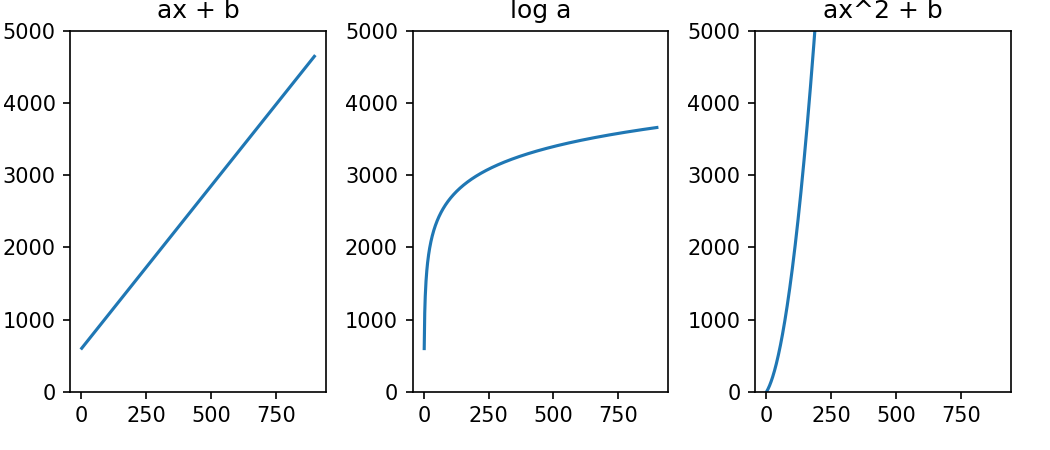

interactive(children=(FloatSlider(value=4.5, description='a', max=8.5, min=0.5, step=0.5), IntSlider(value=600…

In [3]:
functionsPlot()

### Negativo

* Inversão dos valores da imagem
* Pode destacar áreas que antes tinham pouca visibilidade
* Operação:
<br/>
\begin{equation*}
    s = 255 - e
\end{equation*}

In [134]:
def negative_plots():
    fig_luz, ax = plt.subplots(1,1,figsize=(7,3), dpi = 100)
    plt.tight_layout()

    x = np.arange(1, 256)
    y = 255 - x
    ax.plot(x,y, color='k')
    ax.plot(x,x, color='g', alpha=.25)

<IPython.core.display.Javascript object>


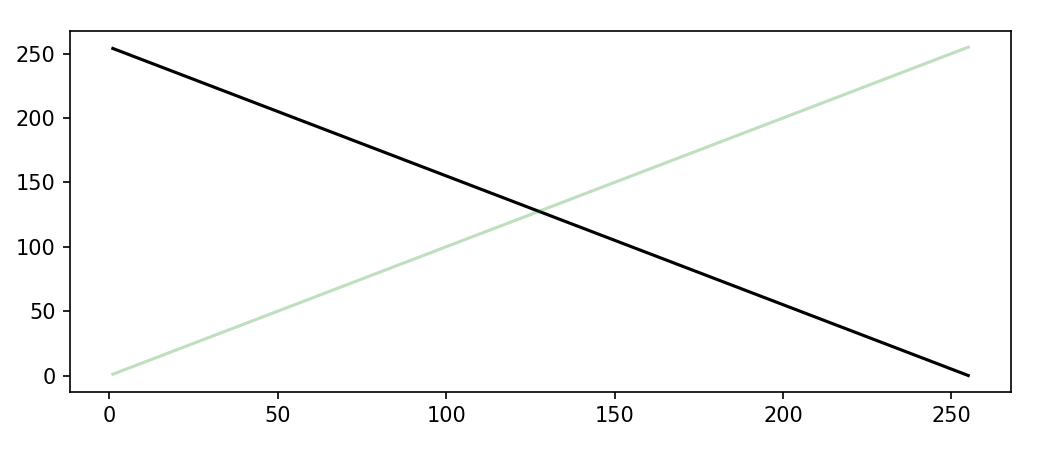

In [135]:
negative_plots()

In [4]:
def negativo(path):
    fig_luz, axes = plt.subplots(1,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    imagem = cv2.imread(path,0)
    negativo = 255 - imagem
    axes[0].imshow(imagem,cmap='gray')
    axes[1].imshow(negativo,cmap='gray')

<IPython.core.display.Javascript object>


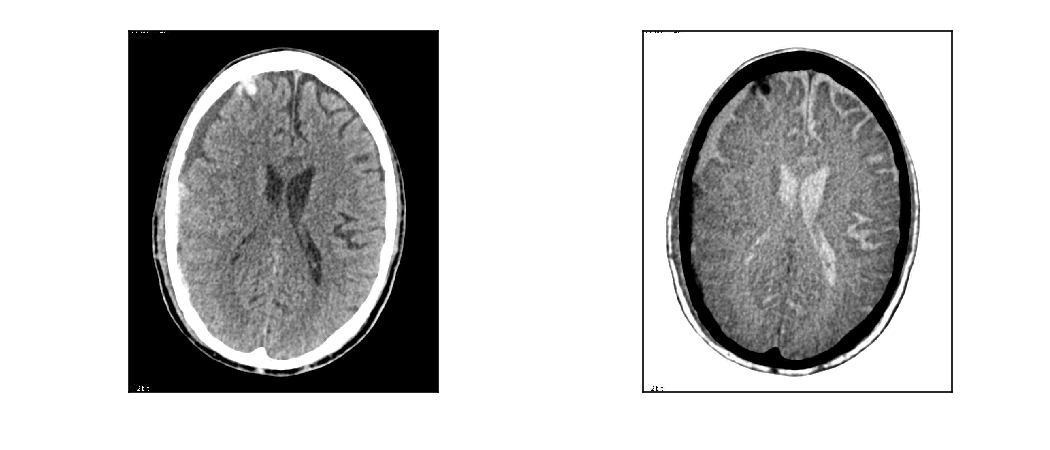

In [5]:
negativo("dataset/brain_ct.jpg")

# Contraste

* A diferença entre iluminação e cores em um mesmo campo de visão
* O contraste de uma imagem pode ser alterado por estética ou para melhorar a estrutura de uma imagem
* Uma operação poed ser realizada para corrigir problemas com iluminação vindo dos sensores de captura
* Superexposição e Sobrexposição

\begin{equation*}
  s = \alpha e + \beta \\
  \alpha\,=\,ganho \\
  \beta\,=\,bias
\end{equation*}

In [62]:
def linearImagem(path):
    fig_luz, ax = plt.subplots(1,3,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    imagem = cv2.imread(path, 0)
    
    def update_plots(a=5, b=50):
        x = np.arange(-100,500)
        x = np.delete(x, 100) # removendo zero para evitar erro de divisão por zero
        ts = ['Imagem Original','Equação','Resultado']
        
        linear = (a*imagem.astype(np.float64))+b
        
        ims = [imagem,(0,0),linear]
        for i in range(3):
            ax[i].clear()
            ax[i].set_title(ts[i])
            if (i == 1):
                ax[i].set_ylim(0,255)
                ax[i].set_xlim(0,255)

                ax[i].plot(x, x*a-b)
            else:
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
                ims[i] = cv2.convertScaleAbs(ims[i])
                ax[i].imshow(ims[i].astype(np.uint8), cmap='gray')

    def plots(a, b):
        update_plots(a,b)

    interact(plots, a=(.1,2.1,.25), b=(-100,100,10));

<IPython.core.display.Javascript object>


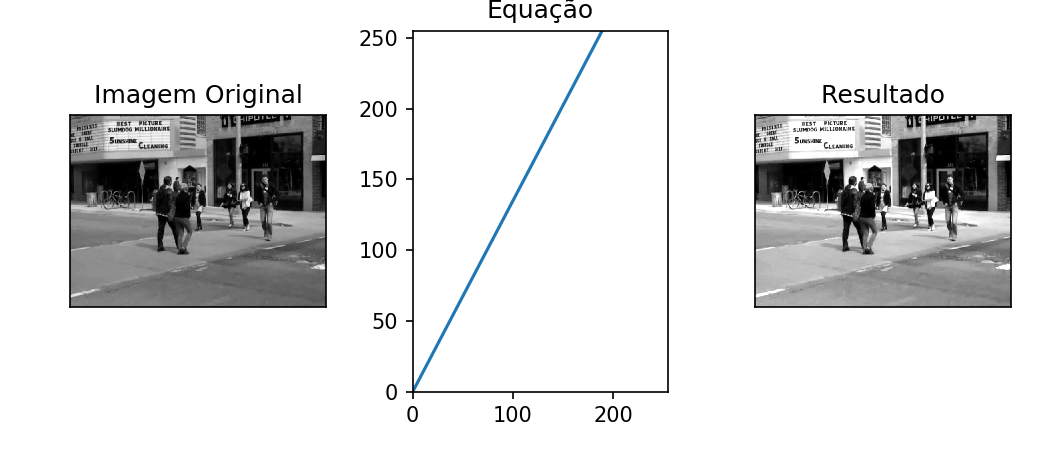

interactive(children=(FloatSlider(value=1.1, description='a', max=2.1, min=0.1, step=0.25), IntSlider(value=0,…

In [63]:
linearImagem("dataset/people_street.jpg")

#### Esticar o contraste
* Para maximizar o contraste deve haver seleção de ganho e do bias
* Ajustado de acordo com o máximo e mínimo da imagem

\begin{equation*}
  \alpha = \dfrac{255}{min-max}  
\end{equation*}
<br/>
\begin{equation*}
  \beta = -\alpha \times min  
\end{equation*}

In [81]:
def contraste_auto(path):
    fig_luz, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3), dpi = 100)
    
    plt.tight_layout()
    for axis in ax:
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
    
    imagem = cv2.imread(path,0)
    minimo = np.min(imagem).astype(np.float64)
    maximo = np.max(imagem).astype(np.float64)
    
    alfa = 255/(minimo-maximo)
    beta = -alfa * minimo
    
    imagem_contraste = maximo + (alfa * imagem + beta)
    imagem_contraste = cv2.convertScaleAbs(imagem_contraste)
    
    ax[0].imshow(imagem, cmap='gray')
    ax[1].imshow(maximo - imagem_contraste, cmap='gray')

    minimo = np.min(imagem_contraste).astype(np.float64)
    maximo = np.max(imagem_contraste).astype(np.float64)

<IPython.core.display.Javascript object>


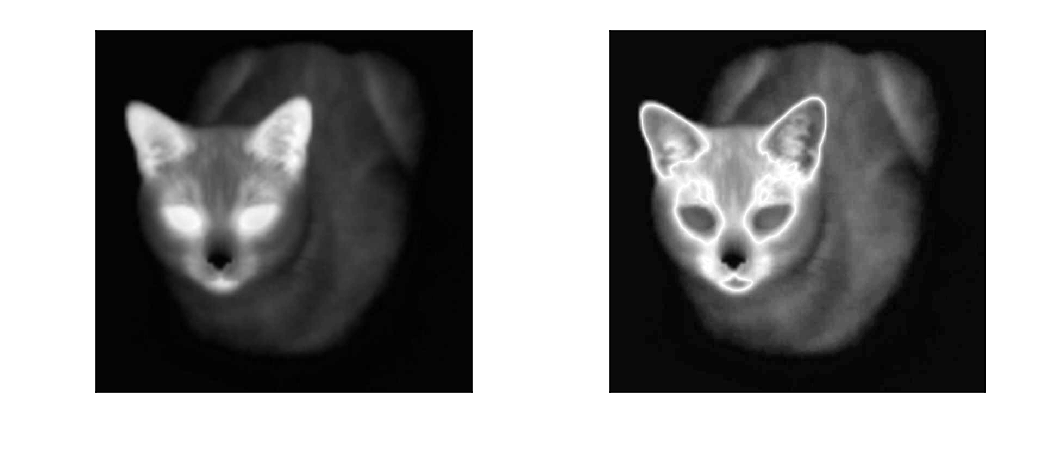

In [82]:
contraste_auto("dataset/thermal_cat.jpg")

# Histograma  

* Uma tabela que contém o número de vezes que um valor aparece
* O histograma de uma imagem contém 256 valores onde a entrada _i_ contém o número de vezes que essa cor aparece na imagem

In [93]:
def mostrarHistograma(path):
    fig_luz, ax = plt.subplots(1,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    imagem = cv2.imread(path, 0)
    
    hist = cv2.calcHist([imagem],[0],None,[256],[0,255])
    
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[0].imshow(imagem,cmap='gray')
    
    ax[1].plot(np.arange(256),hist/hist.size, color='k')
#     ax[1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1].get_yticks()])
    

<IPython.core.display.Javascript object>


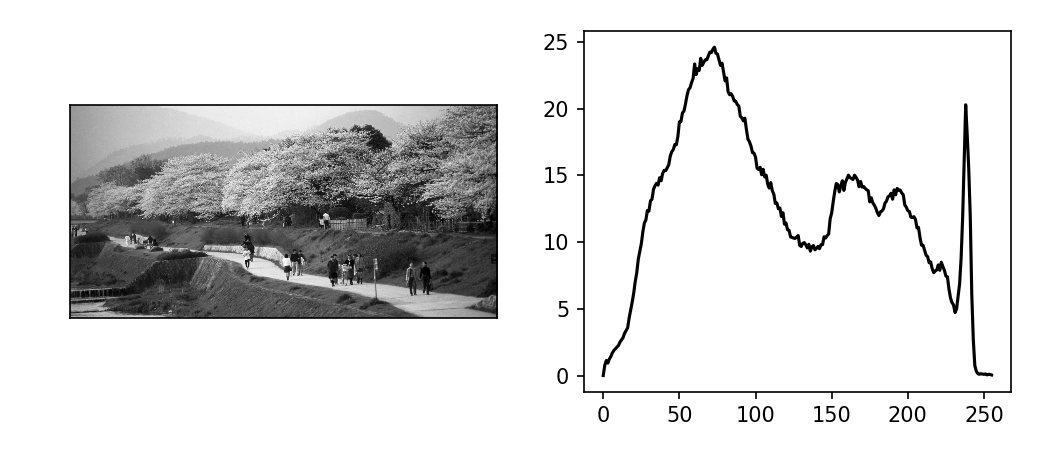

In [94]:
mostrarHistograma("dataset/kyoto.jpg")

In [106]:
def lado_ladoHistograma(path):
    fig_luz, ax = plt.subplots(2,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 0)
    hist = cv2.calcHist([imagem],[0],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(imagem,cmap='gray')

    ax[0][1].plot(np.arange(256),hist/hist.size, color='k');
    #ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])

    
    def update(a,b): 
        contraste = (a*imagem.astype(np.float64))+b
        contraste = cv2.convertScaleAbs(contraste)
        
        hist_const = cv2.calcHist([contraste],[0],None,[256],[0,256])
        
        ax[1][0].clear()
        ax[1][0].get_xaxis().set_visible(False)
        ax[1][0].get_yaxis().set_visible(False)
        ax[1][0].imshow(contraste, cmap='gray')
        
        ax[1][1].clear()
        ax[1][1].plot(np.arange(256), hist_const/hist_const.size, color='k');
        #ax[1][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1][1].get_yticks()])
        
    def plots(a, b):
        update(a, b)

    interact(plots, a=(.1,2,.1), b=(-50,50,10));

<IPython.core.display.Javascript object>


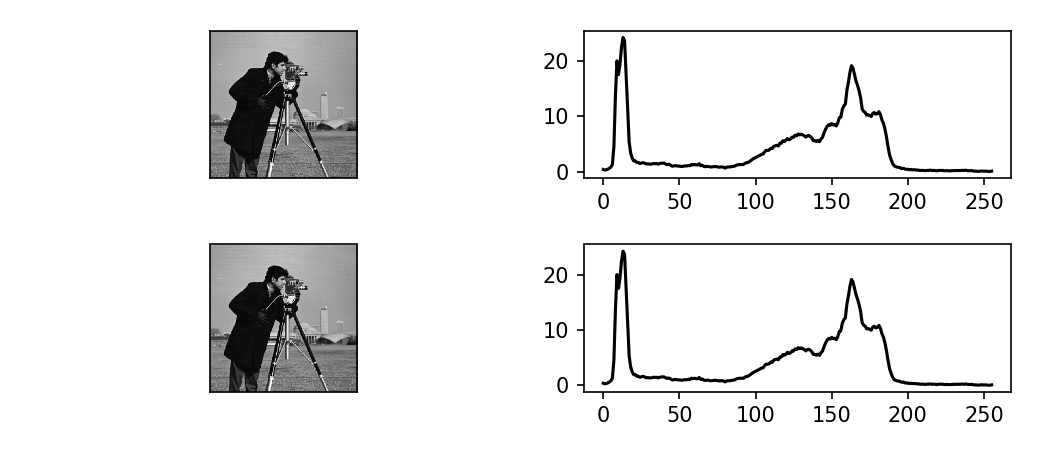

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1), IntSlider(value=0, descriptio…

In [108]:
lado_ladoHistograma("dataset/cameraman.tif") # utilizado aumento de contraste

#### Equalização de histograma
* Procura equalizar o contraste da imagem
* A imagem fica com aproximadamente a mesma quantidade de todas as intensidades disponíveis
* Utiliza a função densidade de probabilidade para gerar uma imagem equalizada

In [125]:
def EqualizacaoHistograma(path):
    fig_luz, ax = plt.subplots(4,2,figsize=(8,5.5), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 0)
    hist = cv2.calcHist([imagem],[0],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(imagem,cmap='gray')
    ax[0][1].plot(np.arange(256),hist/hist.size, color='k');
    #ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])
    
    equalized = cv2.equalizeHist(imagem)
    hist_equal = cv2.calcHist([equalized],[0],None,[256],[0,256])

    ax[1][0].get_xaxis().set_visible(False)
    ax[1][0].get_yaxis().set_visible(False)
    ax[1][0].imshow(equalized, cmap='gray')
    ax[1][1].plot(np.arange(256), hist_equal/hist_equal.size, color='k');
    #ax[1][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1][1].get_yticks()])

    
    hist_manual = cv2.calcHist([imagem],[0],None,[256],[0,256])
    funcao_acumulada = hist.cumsum()
    acumulada_normalizada = funcao_acumulada * hist_manual.max()/ funcao_acumulada.max()
    
    ax[2][0].get_xaxis().set_visible(False)
    ax[2][0].get_yaxis().set_visible(False)
    ax[2][0].imshow(imagem, cmap='gray')
    ax[2][1].plot(np.arange(256), hist_manual, color = 'grey');
    ax[2][1].plot(acumulada_normalizada, color = 'r')
    
    funcao_acumulada_masked = np.ma.masked_equal(funcao_acumulada,0)
    funcao_acumulada_masked = (funcao_acumulada_masked - funcao_acumulada_masked.min())*255/(funcao_acumulada_masked.max()-funcao_acumulada_masked.min())
    funcao_acumulada_equalizada = np.ma.filled(funcao_acumulada_masked,0).astype('uint8')
    
    equalizada_man = funcao_acumulada_equalizada[imagem]
    hist_cumulativa_manual = cv2.calcHist([equalizada_man],[0],None,[256],[0,256])
    
    funcao_acumulada_man = hist_cumulativa_manual.cumsum()
    acumulada_normalizada_manual = funcao_acumulada_man * hist_manual.max()/ funcao_acumulada_man.max()
    
    ax[3][0].get_xaxis().set_visible(False)
    ax[3][0].get_yaxis().set_visible(False)
    ax[3][0].imshow(equalizada_man, cmap='gray')
    ax[3][1].plot(np.arange(256), hist_cumulativa_manual, color = 'grey');
    ax[3][1].plot(acumulada_normalizada_manual, color = 'r')

<IPython.core.display.Javascript object>


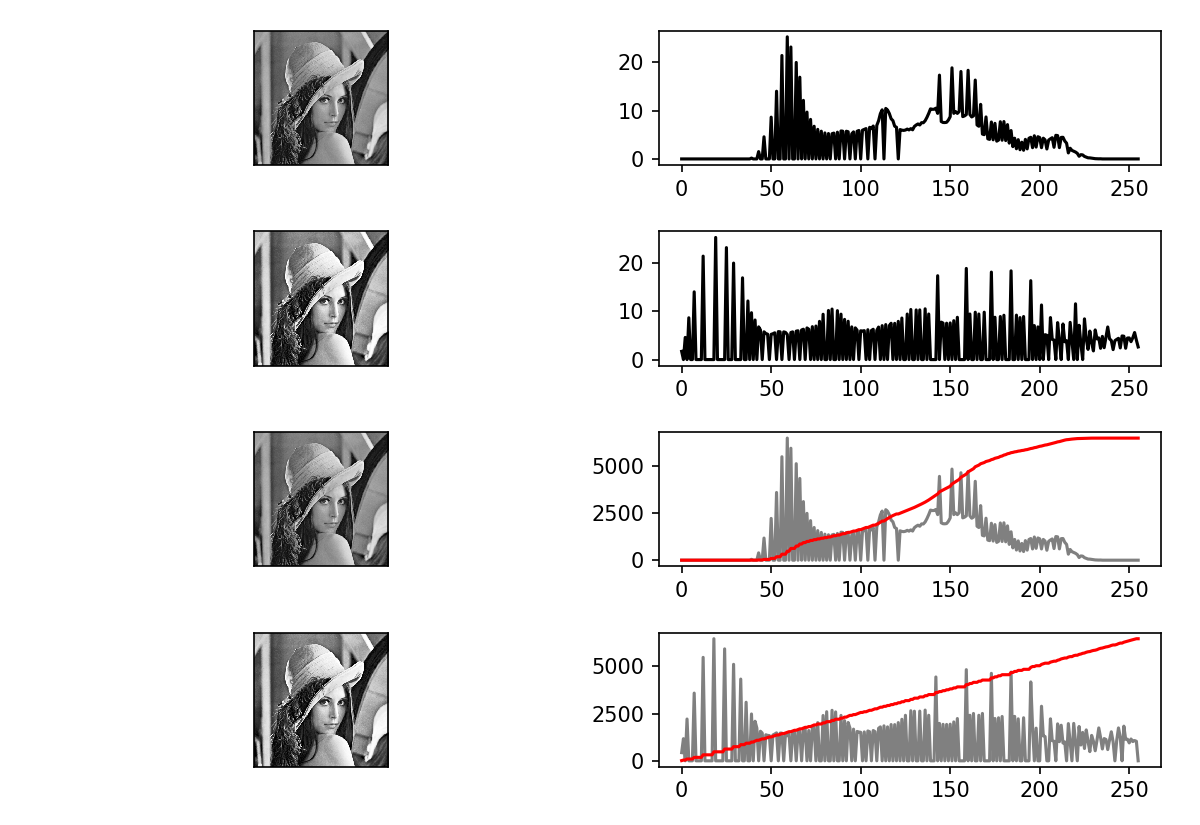

In [127]:
EqualizacaoHistograma('dataset/lenna.png')

# Operações Pontuais em Imagens Coloridas

* Aplicação dos métodos nos canais individuais
* Mudança da imagem para um modelo de cor que tenha a matiz de cor separada, como o HSV

<IPython.core.display.Javascript object>


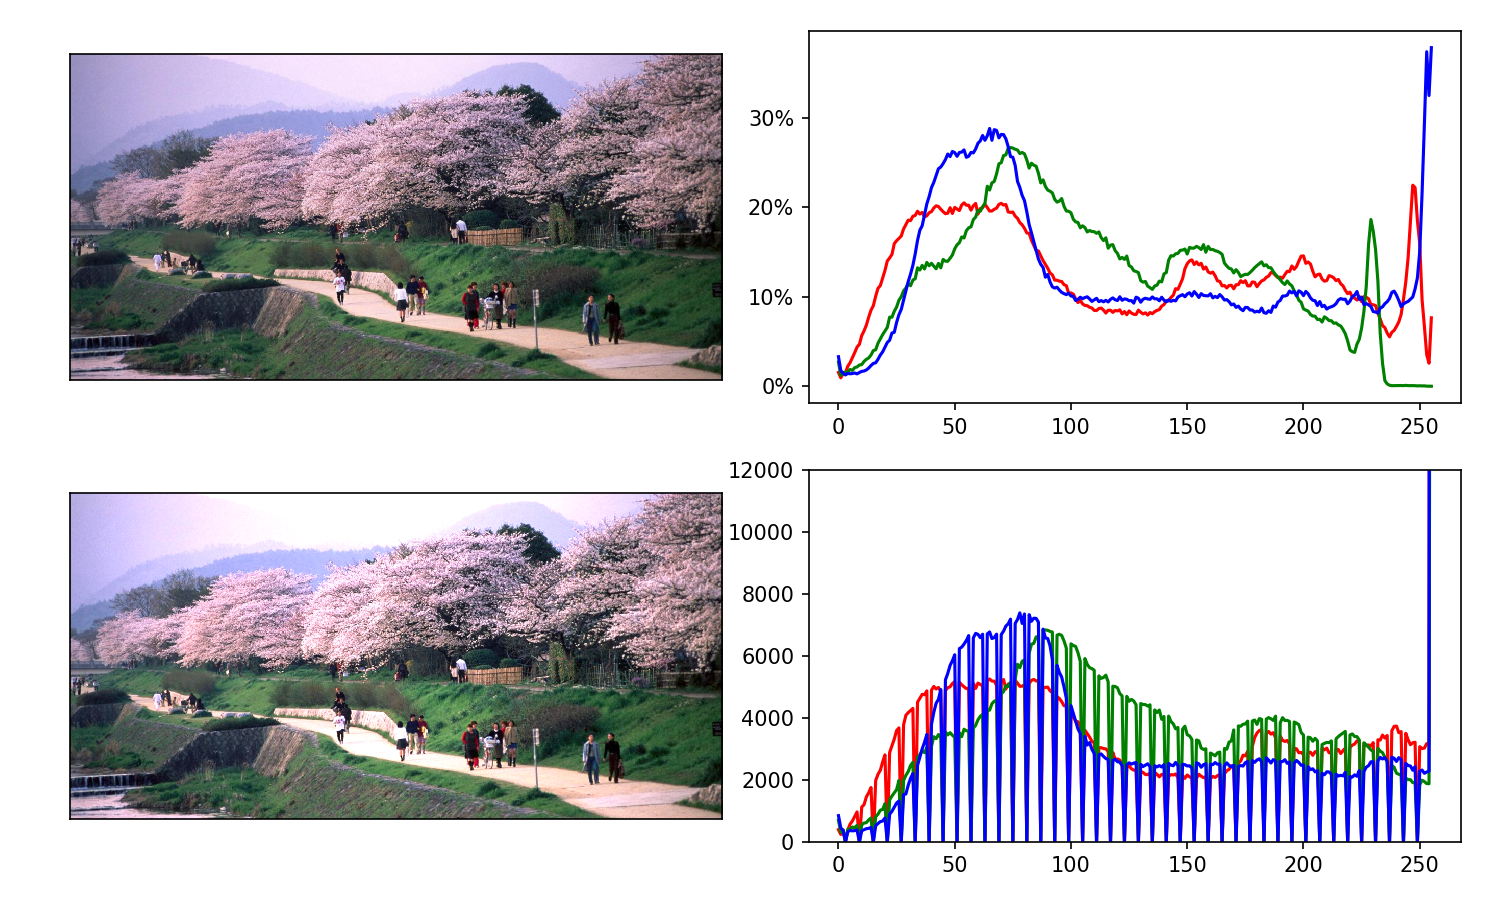

interactive(children=(FloatSlider(value=1.0, description='a', max=1.3, min=0.7), IntSlider(value=0, descriptio…

In [61]:
def colorContrasteHistograma(path):
    fig_luz, ax = plt.subplots(2,2,figsize=(10,6), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 1)
    hist_b = cv2.calcHist([imagem],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([imagem],[1],None,[256],[0,256])
    hist_r = cv2.calcHist([imagem],[2],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

    ax[0][1].plot(np.arange(256),hist_r/hist_r.size, color='r');
    ax[0][1].plot(np.arange(256),hist_g/hist_g.size, color='g');
    ax[0][1].plot(np.arange(256),hist_b/hist_b.size, color='b');
    ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])

    
    def update(a,b): 
        contraste = (a*imagem)+b
        contraste = cv2.convertScaleAbs(contraste).astype(np.uint8)
        
        hist_const_b = cv2.calcHist([contraste],[0],None,[256],[0,256])
        hist_const_g = cv2.calcHist([contraste],[1],None,[256],[0,256])
        hist_const_r = cv2.calcHist([contraste],[2],None,[256],[0,256])
        
        ax[1][0].clear()
        ax[1][0].get_xaxis().set_visible(False)
        ax[1][0].get_yaxis().set_visible(False)
        ax[1][0].imshow(cv2.cvtColor(contraste, cv2.COLOR_BGR2RGB))
        
        ax[1][1].clear()
        ax[1][1].set_ylim(0, 10000*a if a >=1 else 10000*(1+a) )
        ax[1][1].plot(np.arange(256), hist_const_r, color='r');
        ax[1][1].plot(np.arange(256), hist_const_g, color='g');
        ax[1][1].plot(np.arange(256), hist_const_b, color='b');

    interact(update, a=(.7,1.3,.1), b=(-50,50,10));
    
colorContrasteHistograma('dataset/kyoto.jpg')